# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    metric = "metric"
    city_url = f"{url}appid={weather_api_key}&units={metric}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather["coord"]["lat"])
        city_lng = (city_weather["coord"]["lon"])
        city_max_temp = (city_weather["main"]["temp_max"])
        city_humidity = (city_weather["main"]["humidity"])
        city_clouds = (city_weather["clouds"]["all"])
        city_wind = (city_weather["wind"]["speed"])
        city_country = (city_weather["sys"]["country"])
        city_date = (city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | beira
Processing Record 3 of Set 1 | graciano sanchez
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | yar-sale
Processing Record 6 of Set 1 | imeni poliny osipenko
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | saint anthony
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | trincomalee
Processing Record 11 of Set 1 | pallasovka
Processing Record 12 of Set 1 | warqla
City not found. Skipping...
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | shebalino
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | sobolevo
Processing Record 17 of Set 1 | coronado
Processing Record 18 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | kapaa
Processing Reco

Processing Record 36 of Set 4 | luxor
Processing Record 37 of Set 4 | bengkulu
Processing Record 38 of Set 4 | litovko
Processing Record 39 of Set 4 | maniitsoq
Processing Record 40 of Set 4 | biak
Processing Record 41 of Set 4 | kaitangata
Processing Record 42 of Set 4 | kiruna
Processing Record 43 of Set 4 | pacasmayo
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | lata
Processing Record 46 of Set 4 | constitucion
Processing Record 47 of Set 4 | seydi
Processing Record 48 of Set 4 | baykit
Processing Record 49 of Set 4 | salisbury
Processing Record 0 of Set 5 | gornopravdinsk
Processing Record 1 of Set 5 | igrim
Processing Record 2 of Set 5 | saldanha
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | sechura
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 5 | westport
Processing Record 7 of Set 5 | bandarbeyla
Processing Record 8 of Set 5 | sioux lookout
Processing Record 9 of Set 5 | 

Processing Record 28 of Set 8 | kontagora
Processing Record 29 of Set 8 | urusha
Processing Record 30 of Set 8 | perth
Processing Record 31 of Set 8 | lamu
Processing Record 32 of Set 8 | kruisfontein
Processing Record 33 of Set 8 | surgut
Processing Record 34 of Set 8 | samusu
City not found. Skipping...
Processing Record 35 of Set 8 | faanui
Processing Record 36 of Set 8 | houma
Processing Record 37 of Set 8 | savasleyka
Processing Record 38 of Set 8 | mad
Processing Record 39 of Set 8 | ust-nera
Processing Record 40 of Set 8 | srostki
Processing Record 41 of Set 8 | acajutla
Processing Record 42 of Set 8 | miquelon
Processing Record 43 of Set 8 | sete lagoas
Processing Record 44 of Set 8 | ramapuram
Processing Record 45 of Set 8 | hovd
Processing Record 46 of Set 8 | avera
Processing Record 47 of Set 8 | seoul
Processing Record 48 of Set 8 | qaqortoq
Processing Record 49 of Set 8 | sisak
Processing Record 0 of Set 9 | nizwa
Processing Record 1 of Set 9 | madiun
Processing Record 2 o

Processing Record 21 of Set 12 | oranjestad
Processing Record 22 of Set 12 | leshukonskoye
Processing Record 23 of Set 12 | necochea
Processing Record 24 of Set 12 | maxixe
Processing Record 25 of Set 12 | thinadhoo
Processing Record 26 of Set 12 | aguimes
Processing Record 27 of Set 12 | sokoni
Processing Record 28 of Set 12 | neosho
Processing Record 29 of Set 12 | moses lake
Processing Record 30 of Set 12 | kapit
Processing Record 31 of Set 12 | castelo do piaui
Processing Record 32 of Set 12 | superior
Processing Record 33 of Set 12 | cervo
Processing Record 34 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 35 of Set 12 | havre
Processing Record 36 of Set 12 | lodja
Processing Record 37 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 38 of Set 12 | hornepayne
Processing Record 39 of Set 12 | teahupoo
Processing Record 40 of Set 12 | tairua
Processing Record 41 of Set 12 | rungata
City not found. Skipping...
Processing Record 42 of Set 12 | b

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,-24.32,100,99,2.10,GL,1675564677
1,beira,-19.8436,34.8389,24.05,100,20,1.03,MZ,1675564677
2,graciano sanchez,23.9167,-99.2833,14.58,58,69,1.02,MX,1675564678
3,albany,42.6001,-73.9662,-8.21,55,39,2.48,US,1675564526
4,yar-sale,66.8333,70.8333,-17.87,100,81,2.34,RU,1675564678


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-24.32,100,99,2.10,GL,1675564677
1,beira,-19.8436,34.8389,24.05,100,20,1.03,MZ,1675564677
2,graciano sanchez,23.9167,-99.2833,14.58,58,69,1.02,MX,1675564678
3,albany,42.6001,-73.9662,-8.21,55,39,2.48,US,1675564526
4,yar-sale,66.8333,70.8333,-17.87,100,81,2.34,RU,1675564678


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

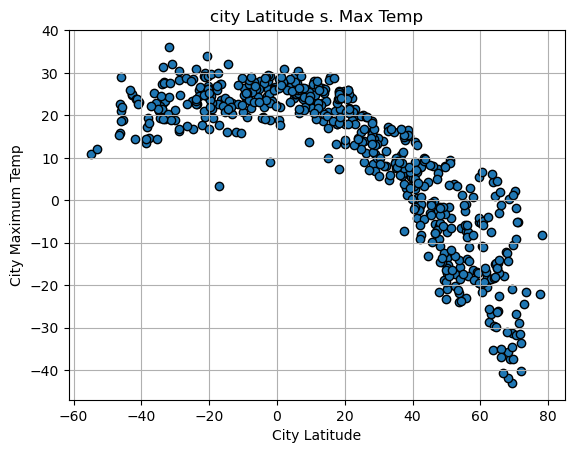

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel ("City Latitude")
plt.ylabel ("City Maximum Temp")
plt.title(f"city Latitude s. Max Temp")
plt.grid()
          

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

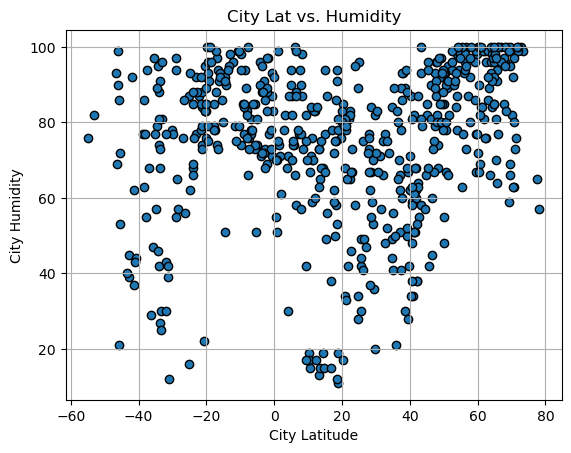

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel ("City Latitude")
plt.ylabel ("City Humidity")
plt.title (f"City Lat vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

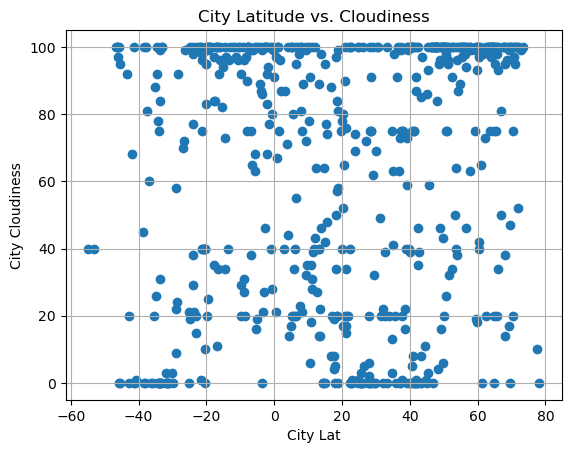

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("City Lat")
plt.ylabel("City Cloudiness")
plt.title(f"City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

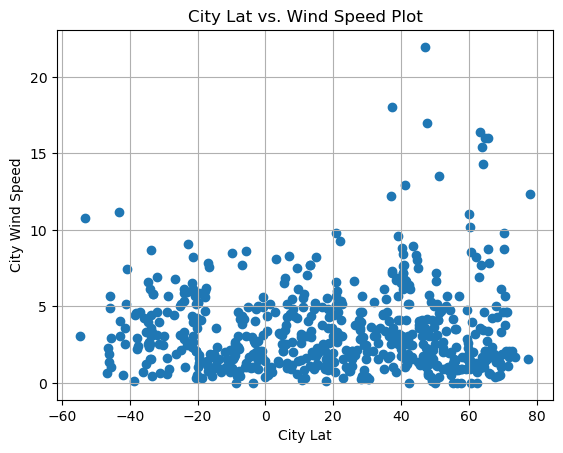

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel ("City Lat")
plt.ylabel ("City Wind Speed")
plt.title ("City Lat vs. Wind Speed Plot")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x,y,text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x,y, edgecolors='black')
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-24.32,100,99,2.10,GL,1675564677
2,graciano sanchez,23.9167,-99.2833,14.58,58,69,1.02,MX,1675564678
3,albany,42.6001,-73.9662,-8.21,55,39,2.48,US,1675564526
4,yar-sale,66.8333,70.8333,-17.87,100,81,2.34,RU,1675564678
5,imeni poliny osipenko,52.4201,136.4853,-20.23,90,100,2.26,RU,1675564679


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,beira,-19.8436,34.8389,24.05,100,20,1.03,MZ,1675564677
7,vaini,-21.2000,-175.2000,30.09,74,75,6.17,TO,1675564605
10,new norfolk,-42.7826,147.0587,24.84,39,0,4.02,AU,1675564683
12,puerto ayora,-0.7393,-90.3518,26.42,93,80,3.13,EC,1675564686
17,busselton,-33.6500,115.3333,31.30,27,31,3.62,AU,1675564692


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8882225100091568


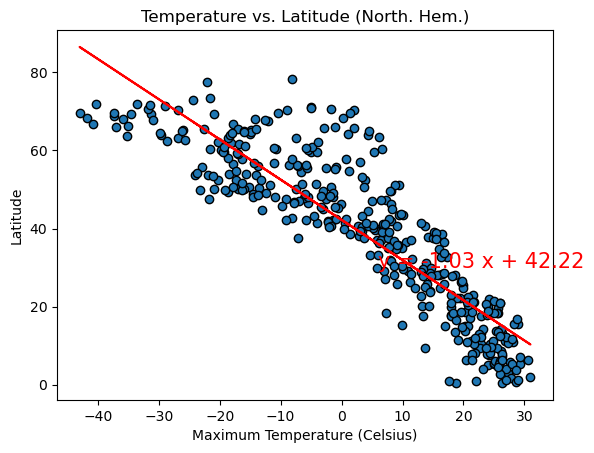

In [20]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Max Temp']
y = northern_hemi_df['Lat']

plt.title("Temperature vs. Latitude (North. Hem.)")
plt.xlabel ("Maximum Temperature (Celsius)")
plt.ylabel ("Latitude")
plot_linear_regression(x, y, (6,30))

The r-squared is: 0.27080978636510716


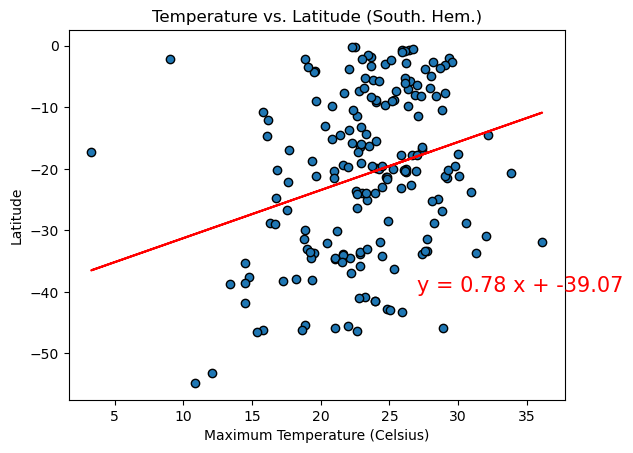

In [21]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df ['Max Temp']
y = southern_hemi_df ['Lat']

plt.title("Temperature vs. Latitude (South. Hem.)")
plt.xlabel ("Maximum Temperature (Celsius)")
plt.ylabel ("Latitude")
plot_linear_regression(x, y, (27, -40))

**Discussion about the linear relationship:** Two scatter plots shows linear regression on North and South hemisphere respectively. The countries in north hemisphere has strong correlation of -0.8882225100091568, and on the other side countries in south hemisphere has weak correlation of 0.27.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.4100913691672071


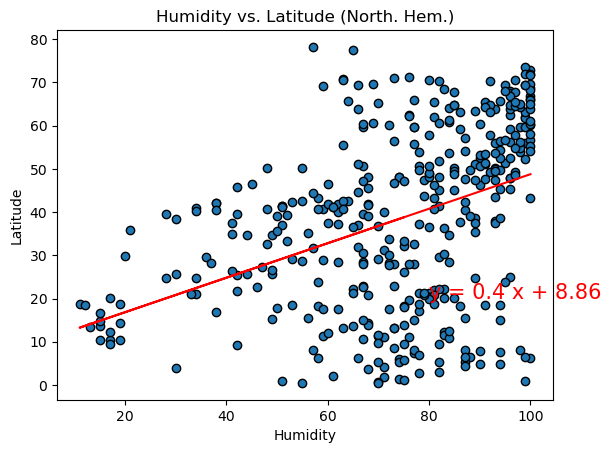

In [22]:
# Northern Hemisphere
x = northern_hemi_df['Humidity']
y = northern_hemi_df['Lat']

plt.title("Humidity vs. Latitude (North. Hem.)")
plt.xlabel ("Humidity")
plt.ylabel ("Latitude")

plot_linear_regression(x, y, (80,20))

The r-squared is: 0.3708881135436895


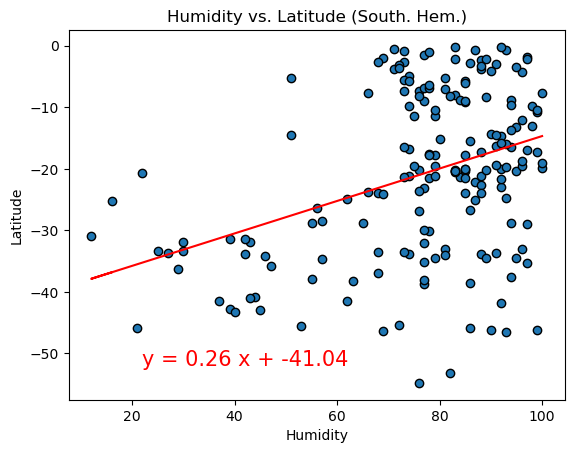

In [23]:
# Southern Hemisphere
x = southern_hemi_df ['Humidity']
y = southern_hemi_df ['Lat']

plt.title("Humidity vs. Latitude (South. Hem.)")
plt.xlabel ("Humidity")
plt.ylabel ("Latitude")
plot_linear_regression(x, y, (22, -52))

**Discussion about the linear relationship:** If we compare Humidity with South and North hamisphere then both the latitude is delivering almost same results as we can see in the plot. Humidity in the North Hamisphere giving r-value 0.41, which is slight positive correlation as a location moves north from the equator, humidity increase. If we talk about the South hamisphere which deliver r value of 0.37 almost same as the north hamisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.26373612288109727


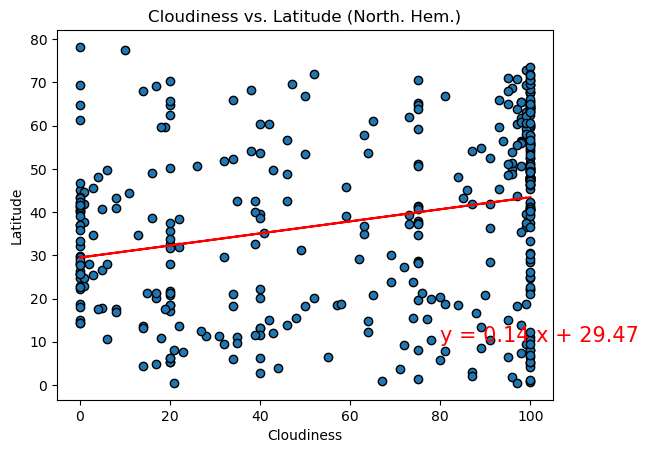

In [24]:
# Northern Hemisphere
x = northern_hemi_df['Cloudiness']
y = northern_hemi_df['Lat']

plt.title("Cloudiness vs. Latitude (North. Hem.)")
plt.xlabel ("Cloudiness")
plt.ylabel ("Latitude")

plot_linear_regression(x, y, (80,10))

The r-squared is: 0.32384951317407146


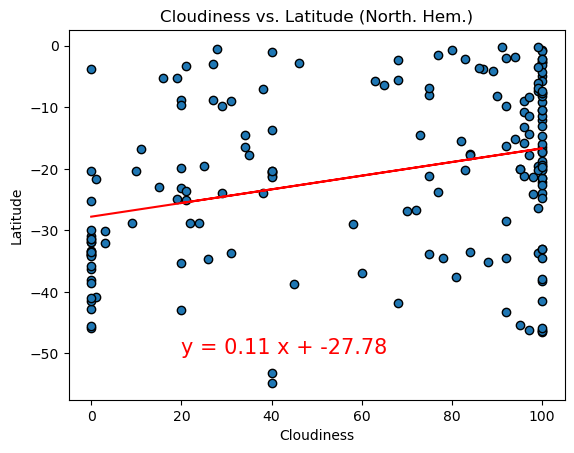

In [25]:
# Southern Hemisphere
x = southern_hemi_df['Cloudiness']
y = southern_hemi_df['Lat']

plt.title("Cloudiness vs. Latitude (North. Hem.)")
plt.xlabel ("Cloudiness")
plt.ylabel ("Latitude")

plot_linear_regression(x, y, (20,-50))

**Discussion about the linear relationship:** Cloudiness in North and South hamisphere also deliver almost same correlation with the r values of 0.26 and 0.32 repsectively. Cities in south and cloud coverage has strong correlation than the cities in north.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.06235392318237634


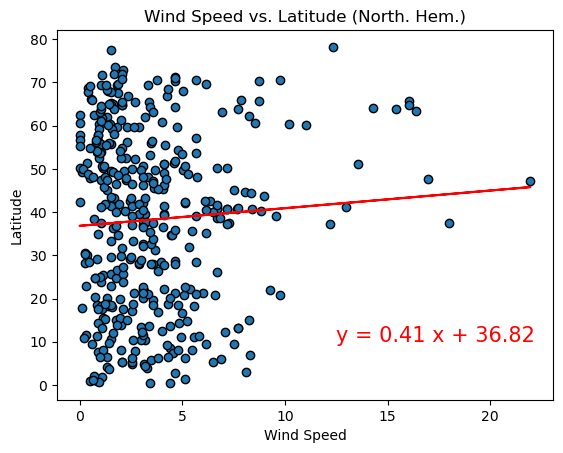

In [26]:
# Northern Hemisphere
x = northern_hemi_df['Wind Speed']
y = northern_hemi_df['Lat']

plt.title("Wind Speed vs. Latitude (North. Hem.)")
plt.xlabel ("Wind Speed")
plt.ylabel ("Latitude")

plot_linear_regression(x, y, (12.5,10))

The r-squared is: -0.21778331714189889


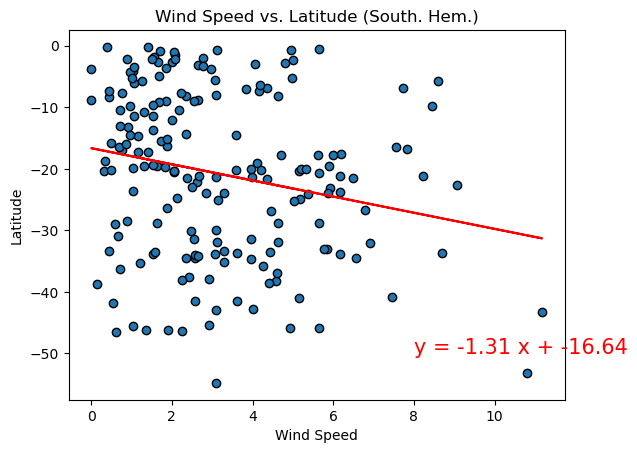

In [28]:
# Southern Hemisphere
x = southern_hemi_df['Wind Speed']
y = southern_hemi_df['Lat']

plt.title("Wind Speed vs. Latitude (South. Hem.)")
plt.xlabel ("Wind Speed")
plt.ylabel ("Latitude")

plot_linear_regression(x, y, (8,-50))

**Discussion about the linear relationship:** Here if we compare North and South hamisphere with the Wind speed of different countries than this will give us totally different r values of 0.06 and -0.22. The northern hemisphere exhibited a marginal positive correlation between windspeed and latitude.